# 2022_01_24_Problema 1

Se dispone de un conjunto de entrenamiento en $\mathbb{R}^2$ con el que se prentende entrenar un modelo basado en máquinas de vectores soporte. Los multiplicadores de Lagrange óptimos obtenidos para $C=10$ son:
$$\begin{array}{|l||rrrrrrrr|}
\hline
i     &  1 &  2 &  3 &  4 &  5 &  6 &  7 & 8\\
\hline
x_{i1} &  3 &  2 &  4 &  2 &  2 &  4 &  1 & 4\\
x_{i2} &  4 &  5 &  4 &  2 &  3 &  2 &  4 & 3\\ 
\hline
\text{Clase} & -1& -1 & -1& +1 & -1& +1 & +1 & -1\\
\hline
\hline
\alpha^\star_i & 0 & 0  &  0 &  0 &  10& 9.11&7.11&6.22\\
\hline
\end{array}$$

Se pide:
1. Obtener la función discriminante lineal correspondiente
2. Representar gráficamente la frontera lineal de separación entre clases y las muestras de entrenamiento, indicando cuáles son vectores soporte
3. Clasificar la muestra $(6,5)^t$

## Solución

**Pesos de la función discriminante:**

$\boldsymbol{\theta}^\star = c_5~\alpha^\star_5~\boldsymbol{x_5} 
              + c_6~\alpha^\star_6~\boldsymbol{x_6} 
              + c_7\alpha^\star_4~\boldsymbol{x_7} 
              + c_8\alpha^\star_8~\boldsymbol{x_8} $

$\theta^*_1~=~ (-1)~(2)~(10)+(+1)~(4)~(9.11)+(+1)~(1)~(7.11)+(-1)~(4)~(6.22) ~=~-1.33$

$\theta^*_2~=~ (-1)~(3)~(10)+(+1)~(2)~(9.11)+(+1)~(4)~(7.11)+(-1)~(3)~(6.22) ~=~-2.00$

Usando el vector soporte $\boldsymbol{x_7}$ (que verifica la condición : $0 < \alpha_1^* < C$)

$\theta^\star_0 = c_7 - {\boldsymbol{\theta}^\star}^t\boldsymbol{x_7} =  1 - ((-1.33)~(1) - (2.00)~(4)) = 10.33$

Función discriminante: $\;\phi(\boldsymbol{x}) = 10.33 - 1.33 x_1 - 2 x_2$

**Frontera de separación y representación gráfica:**

Ecuación de la frontera lineal de separación:
$~ 10.33 - 1.33~x_1 -  2.00~x_2 ~=~ 0 ~~\rightarrow~~$ 
$  x_2 = - 0.665~x_1 + 5.165\,$.

Los vectores de entrenamiento son todos los de la tabla.  De ellos,
los vectores soporte son: $(1,4)^t, (2,3)^t, (4,2)^t, (4,3)^t\,$.

Representación gráfica:
<div><img src="2022_01_24_Problema 1.png" width=400></div>

**Clasificación de la muestra $(6,5)^t$:**

El valor de la función discriminante para  $(6,5)^t$  es:

$~\theta^*_0+6*\theta^*_1+5*\theta^*_2~=~ 10.33 + 6*(-1.33) + 5*(-2.00)~=~ -7.65 <0 ~\Rightarrow\,$ clase -1.

## Solución con sklearn

In [1]:
import numpy as np; np.set_printoptions(precision=4, suppress=True); from sklearn import svm
X = np.array([[3, 4], [2, 5], [4, 4], [2, 2], [2, 3], [4, 2], [1, 4], [4, 3]]).astype(np.float32)
y = np.array([-1, -1, -1, 1, -1, 1, 1, -1]).astype(np.int32); N, D = X.shape
C = 10.0; clf = svm.SVC(C=C, kernel='linear').fit(X, y)
a = np.zeros(N); a[clf.support_] = clf.dual_coef_ * y[clf.support_]; print('alfa: ', a)
w = clf.coef_[0]; w0 = clf.intercept_ [0]; m = 2.0/np.linalg.norm(w);
t = np.zeros(N); t[clf.support_] = 1.0 - y[clf.support_] * (clf.support_vectors_ @ w + w0)
print('w:', w, ' w0:', round(w0, 4), ' margen:', round(m, 4), ' t:', t)
Z = [[6, 5]]; print('Clase de', Z[0],':',clf.predict(Z)[0])

alfa:  [ 0.      0.      0.      0.     10.      9.1102  7.111   6.2212]
w: [-1.3331 -1.9992]  w0: 10.3299  margen: 0.8323  t: [ 0.      0.      0.      0.      2.6664  0.0006 -0.0003  0.0003]
Clase de [6, 5] : -1


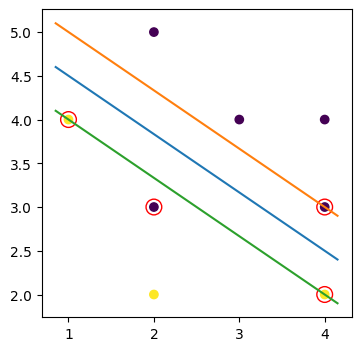

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(4, 4)); ax.scatter(*X.T, c=y)
x1 = np.linspace(*ax.get_xlim()); x2 = (-w[0]*x1 - w0)/w[1]
ax.plot(x1, x2, x1, x2 - 1/w[1], x1, x2 + 1/w[1])
ax.scatter(*clf.support_vectors_.T, s=128, facecolors='none', edgecolors='r');